## Experiments

In [1]:
import pandas as pd
import seaborn as sns
import seaborn.objects as so

In [2]:
replications = 25
exp_nr = 6
exp_names = ["no-drones", "short-range", "slow-reroute", "more-drones", "large-view", "fast-reroute", "many-long-range"]
exp_names = [f"{i}_{name}" for i, name in enumerate(exp_names)]
print(exp_names)

['0_no-drones', '1_short-range', '2_slow-reroute', '3_more-drones', '4_large-view', '5_fast-reroute', '6_many-long-range']


In [3]:
# Read all the pickles into a dictionary of dataframes
dfs = {}
for name in exp_names:
    dfs[name] = pd.read_pickle(f"../results/experiments/exp_series_{name}_{replications}r_df.pickle")

In [4]:
KPI = "recovered-hospital"
df720 = pd.DataFrame()
for name, df in dfs.items():
    df720[name] = df.iloc[720][KPI]
df720.head(3)

,0_no-drones,1_short-range,2_slow-reroute,3_more-drones,4_large-view,5_fast-reroute,6_many-long-range
0,667.0,594.0,618.0,571.0,612.0,671.0,612.0
1,461.0,622.0,644.0,549.0,625.0,482.0,568.0
2,532.0,587.0,445.0,690.0,524.0,581.0,458.0


Text(0.5, 1.0, 'recovered-hospital')

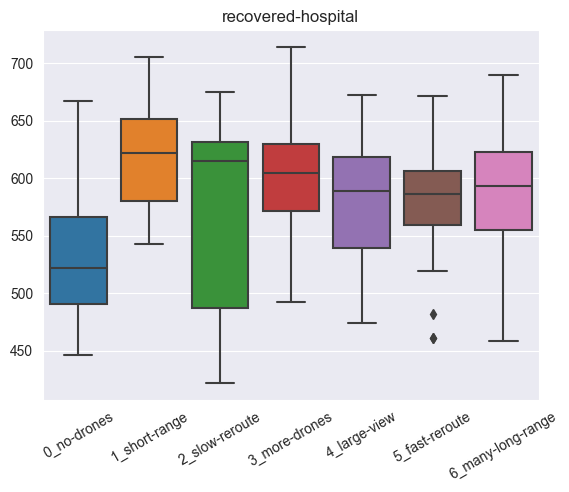

In [5]:
g = sns.boxplot(df720)
g.set_xticklabels(g.get_xticklabels(), rotation=30)
g.set_title(KPI)